In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


# Import Libraries

In [2]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# read data

In [3]:

data=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

# print 5 frist data

In [4]:

print(data.head())

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


# print data columns

In [5]:

x=1
for col in data.columns:
    print(f'column {x} is : ',col)
    x+=1

column 1 is :  long_hair
column 2 is :  forehead_width_cm
column 3 is :  forehead_height_cm
column 4 is :  nose_wide
column 5 is :  nose_long
column 6 is :  lips_thin
column 7 is :  distance_nose_to_lip_long
column 8 is :  gender


# data corr

                           long_hair  forehead_width_cm  forehead_height_cm  \
long_hair                   1.000000          -0.006530           -0.017233   
forehead_width_cm          -0.006530           1.000000            0.088596   
forehead_height_cm         -0.017233           0.088596            1.000000   
nose_wide                   0.001216           0.251648            0.211655   
nose_long                   0.014432           0.257368            0.194120   
lips_thin                   0.011287           0.258564            0.205441   
distance_nose_to_lip_long  -0.025794           0.251328            0.215292   

                           nose_wide  nose_long  lips_thin  \
long_hair                   0.001216   0.014432   0.011287   
forehead_width_cm           0.251648   0.257368   0.258564   
forehead_height_cm          0.211655   0.194120   0.205441   
nose_wide                   1.000000   0.565192   0.557615   
nose_long                   0.565192   1.000000   0.56122

<AxesSubplot:>

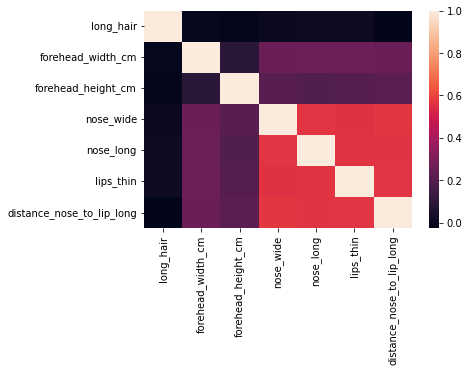

In [6]:

print(data.corr()) 
sns.heatmap(data.corr())

# data info

In [7]:

print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None


# show data contain null data

In [8]:

print(data.isnull().sum())

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


# show data contain dublicate data

In [9]:

print(data.duplicated().sum())

1768


# data describe

In [10]:

print(data.describe())

         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000

# show input X and output y

In [11]:

col=data.shape[1]
X=data.iloc[:,0:col-1]
y=data.iloc[:,col-1:col]
print(col)
print(X.shape)
print(y.shape)
X_bar=X.keys()

8
(5001, 7)
(5001, 1)


# transformation output y string

In [12]:

label=LabelEncoder()
y=label.fit_transform(y)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# MinMaxScaler for Data

In [13]:

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

# showing data

In [14]:

print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[1.         0.09756098 0.5        1.         0.         1.
  1.        ]
 [0.         0.63414634 0.15       0.         0.         1.
  0.        ]
 [0.         0.09756098 0.6        1.         1.         1.
  1.        ]
 [0.         0.73170732 0.5        0.         1.         1.
  1.        ]
 [1.         0.51219512 0.4        0.         0.         0.
  0.        ]
 [1.         0.3902439  0.85       1.         1.         1.
  1.        ]
 [1.         0.95121951 0.55       1.         1.         1.
  0.        ]
 [0.         0.3902439  0.05       0.         0.         0.
  0.        ]
 [1.         0.12195122 0.15       1.         0.         1.
  1.        ]
 [1.         0.17073171 0.15       0.         0.         0.
  0.        ]]
y 
 [1 0 1 1 0 1 1 0 0 0]


# data spliting

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3350, 7)
X_test shape is  (1651, 7)
y_train shape is  (3350,)
y_test shape is  (1651,)


# Applying LogisticRegression Model 

In [16]:

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

# Calculating Details

In [17]:

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.9686567164179104
LogisticRegressionModel Test Score is :  0.9678982434887947
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [21]


# Calculating Prediction

In [18]:

y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities aluVe for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [1 1 0 0 0 0 0 0 0 0]
Prediction Probabilities aluVe for LogisticRegressionModel is :  [[3.15969878e-02 9.68403012e-01]
 [9.66299676e-04 9.99033700e-01]
 [9.97735912e-01 2.26408791e-03]
 [9.96857230e-01 3.14276971e-03]
 [9.99756465e-01 2.43535037e-04]
 [9.98931131e-01 1.06886941e-03]
 [9.98750638e-01 1.24936233e-03]
 [9.99176481e-01 8.23519316e-04]
 [9.83839211e-01 1.61607887e-02]
 [7.25599676e-01 2.74400324e-01]]


# Applying RandomForestClassifier Model 

In [19]:

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=33)

# Calculating Details

In [20]:

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('RandomForestClassifierModel Classes are : ' , RandomForestClassifierModel.classes_)

RandomForestClassifierModel Train Score is :  0.9985074626865672
RandomForestClassifierModel Test Score is :  0.9715324046032707
RandomForestClassifierModel features importances are :  [0.00264964 0.09194339 0.06083447 0.22959586 0.20446669 0.18473853
 0.22577141]
RandomForestClassifierModel Classes are :  [0 1]


# display RandomForestClassifierModel.feature_importances_

<BarContainer object of 7 artists>

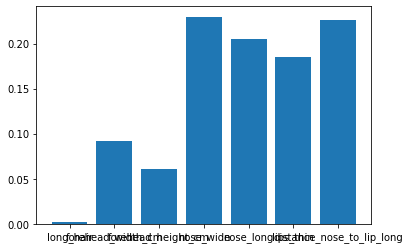

In [21]:

plt.figure()
plt.bar(X_bar,RandomForestClassifierModel.feature_importances_)

# Calculating Prediction

In [22]:

y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 1 0 0 0 0 0 0 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.39 0.61]]


# Calculating Confusion Matrix

In [23]:

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[832  18]
 [ 29 772]]


#  drawing confusion matrix

<AxesSubplot:>

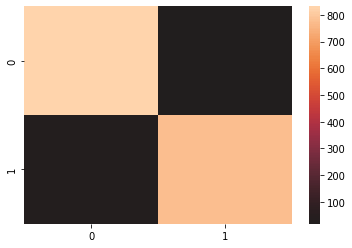

In [24]:

plt.figure()
sns.heatmap(CM, center = True)

# Calculating Confusion Matrix

In [25]:

CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[1650    1]
 [   4 1695]]


# drawing confusion matrix

<AxesSubplot:>

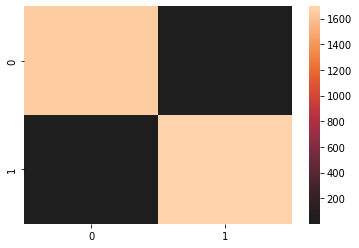

In [26]:

plt.figure()
sns.heatmap(CM, center = True)

# Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [27]:

AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9715324046032707


# Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)

In [28]:

F1Score = f1_score(y_test, y_pred, average='micro') 
print('F1 Score is : ', F1Score)

F1 Score is :  0.9715324046032707


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  

In [29]:

PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9715324046032707


# predict test_data is csv

In [30]:

y_pred2=[]
for i in range(len(y_pred)):
    if y_pred[i]==1:
        y_pred2.append('Male')
    else:
        y_pred2.append('Female')
y_pred2=np.array(y_pred2)        
submision=pd.DataFrame(y_pred2,columns=['y_pred'],)
submision.to_csv('/kaggle/working/y_pred.csv')

# display y_train ,y_test_train

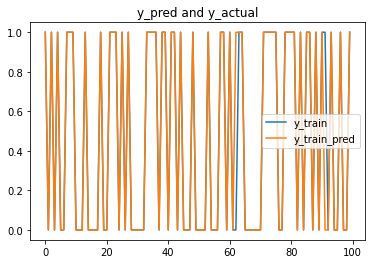

In [31]:

plt.figure()
plt.plot(y_train[:100],label='y_train')
plt.plot(RandomForestClassifierModel.predict(X_train[:100]),label='y_train_pred')
plt.title('y_pred and y_actual')
plt.legend()

# display y_test ,y_test_pred

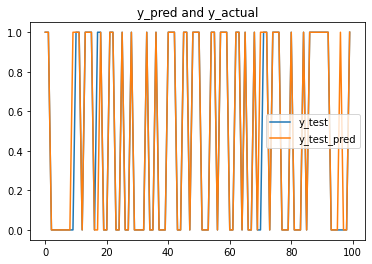

In [32]:

plt.figure()
plt.plot(y_test[:100],label='y_test')
plt.plot(RandomForestClassifierModel.predict(X_test[:100]),label='y_test_pred')
plt.title('y_pred and y_actual')
plt.legend()